In [70]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [72]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

scaler = MinMaxScaler().fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


svm = SVC()
svm.fit(scaled_X_train, y_train)

print(f"Test Score : {svm.score(scaled_X_test, y_test):.4f}")

Test Score : 0.9720


In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
              "gamma" : [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 5)
grid.fit(scaled_X_train, y_train)

print(f"Best validation score : {grid.best_score_:.2f}")
print(f"Test Score : {grid.score(scaled_X_test, y_test)}")
print("Best Params : ", grid.best_params_)


Best validation score : 0.98
Test Score : 0.972027972027972
Best Params :  {'C': 1, 'gamma': 1}


# 파이프라인 구축하기

In [73]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)

print(f"Test Score : {pipe.score(X_test , y_test) : .2f}")

Test Score :  0.97


# 그리드 서치에 파이프라인 적용하기

In [7]:
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [8]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
grid.fit(X_train, y_train)

print(f"Best validation score : {grid.best_score_:.2f}")
print(f"Test Score : {grid.score(X_test, y_test)}")
print("Best Params : ", grid.best_params_)

Best validation score : 0.98
Test Score : 0.972027972027972
Best Params :  {'svm__C': 1, 'svm__gamma': 1}


In [9]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
    self.steps[-1][1].fit(X_transformed, y)
    return self

# make_pipeline을 이용한 파이프라인 생성

In [10]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C = 100))])

pipe_short = make_pipeline(MinMaxScaler(), SVC(C = 100))

In [11]:
print(pipe_short.steps)

[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components = 2), StandardScaler())
print(pipe.steps)

[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [17]:
pipe.fit(cancer.data)
components = pipe.named_steps["pca"].components_
components.shape

(2, 30)

# 그리드 서치 안의 파이프라인 속성에 접근하기

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))

In [77]:
param_grid = {"logisticregression__C" : [0.001, 0.01, 0.1, 1, 10, 100]}

In [78]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 4)
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100]})

In [79]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])

In [80]:
print("로지스틱 회귀 단계 : ",grid.best_estimator_.named_steps["logisticregression"])

로지스틱 회귀 단계 :  LogisticRegression(C=1, max_iter=1000)


In [82]:
print("로지스틱 회귀 계수 : \n",grid.best_estimator_.named_steps["logisticregression"].coef_)

로지스틱 회귀 계수 : 
 [[-0.43570655 -0.34266946 -0.40809443 -0.5344574  -0.14971847  0.61034122
  -0.72634347 -0.78538827  0.03886087  0.27497198 -1.29780109  0.04926005
  -0.67336941 -0.93447426 -0.13939555  0.45032641 -0.13009864 -0.10144273
   0.43432027  0.71596578 -1.09068862 -1.09463976 -0.85183755 -1.06406198
  -0.74316099  0.07252425 -0.82323903 -0.65321239 -0.64379499 -0.42026013]]


# 전처리와 모델의 매개변수를 위한 그리드 서치

In [83]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge


boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

param_grid = {"polynomialfeatures__degree" : [1,2,3],
              "ridge__alpha" : [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

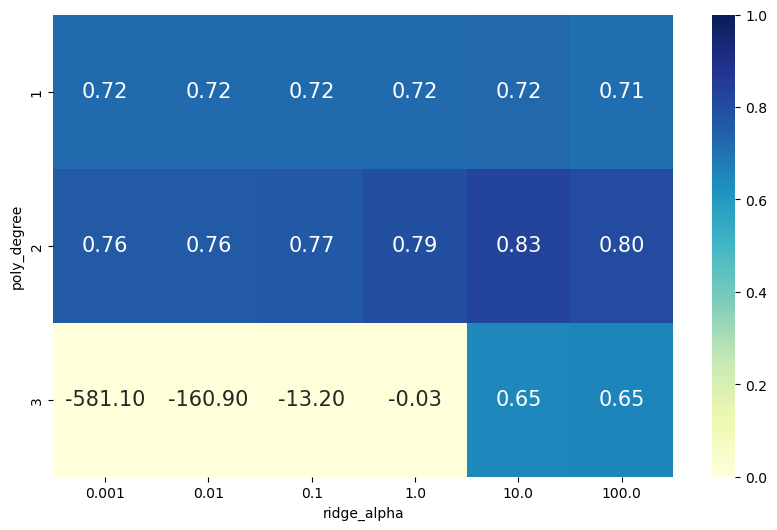

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize = (10, 6))

results = pd.DataFrame(grid.cv_results_["mean_test_score"].reshape(3,-1))
results.columns = [0.001,0.01,0.1,1,10,100]
results.index = [1,2,3]

sns.heatmap(results, annot = True, annot_kws = {"size":15}, fmt = ".2f",vmin = 0,vmax = 1,
            cmap = "YlGnBu")

plt.xlabel("ridge_alpha")
plt.ylabel("poly_degree");


In [89]:
print("최적의 매개변수 : ",grid.best_params_)
print(f"Test Score : {grid.score(X_test, y_test)}")

최적의 매개변수 :  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
Test Score : 0.768304546410014


In [90]:
param_grid = {"ridge__alpha" : [0.001,0.01,0.1,1,10,100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train, y_train)

print(f"다항 특성이 없을 때 Test Score : {grid.score(X_test, y_test)}")

다항 특성이 없을 때 Test Score : 0.6272671927504456


# 모델 선택을 위한 그리드 서치

In [62]:
from sklearn.svm import SVC

In [64]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [91]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('preprocessing', StandardScaler()), ("classifier", SVC())])

param_grid = [
    {"classifier" : [SVC()], "preprocessing" : [StandardScaler()],
     "classifier__gamma" : [0.001, 0.01, 0.1, 1, 10, 100],
     "classifier__C" : [0.001, 0.01, 0.1, 1, 10, 100]},
    {"classifier" : [RandomForestClassifier()],
     "preprocessing" : [None],
     "classifier__max_features" : [1,2,3]}
]


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=10, gamma=0.01)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler()]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [69]:
print(f"최적의 매개변수:\n{grid.best_params_}\n")
print(f"최상의 교차 검증 점수 : {grid.best_score_:.4f}")
print(f"테스트 세트 점수 : {grid.score(X_test, y_test):.4f}")

최적의 매개변수:
{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

최상의 교차 검증 점수 : 0.9859
테스트 세트 점수 : 0.9790
